Visualisation of loc data

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [4]:
#Import csv
import glob
import os
PATH = os.getcwd()+ "/logs/VGG11/Cifar10"
print (PATH)
all_files = glob.glob(os.path.join(PATH, "*.csv"))    

accuracy = pd.DataFrame(columns=['Batchsize', 'Training', 'Test'])


dflist = []
for f in all_files:
    dflist.append(pd.read_csv(f))
df_concatenated = pd.concat(dflist, ignore_index=True)
df_concatenated.head()

listi= []
columns = ['test_accuracy','training_accuracy']
# listi = pd.read_csv(PATH + "/VGG11_bs8_e20_id0.csv", sep= ';',usecols=columns) #, 
# listi
# listi2= []
# columns = ['test_accuracy','training_accuracy']
# listi2 = pd.read_csv(PATH + "/VGG11_bs8_e20_idADAM.csv", sep= ';',usecols=columns) #, 
# listi2

# dflist = []

# dflist.append(listi)
# dflist.append(listi2)
# df_concatenated = pd.concat(dflist, ignore_index=True)
# df_concatenated


all_bs8 = glob.glob(os.path.join(PATH + "/bs8", "*.csv")) 
bs8 = []
for f in all_bs8:
    bs8.append(pd.read_csv(f,sep= ';',usecols=columns))
    
df_concatenated = pd.concat(bs8, ignore_index=True)


add = pd.DataFrame([[8,df_concatenated['training_accuracy'].mean(),df_concatenated['test_accuracy'].mean()]], columns=['Batchsize', 'Training', 'Test'])
accuracy =accuracy.append(add, ignore_index=True)


#######32 code doppelungen sollte gelöscht werden

all_bs32 = glob.glob(os.path.join(PATH + "/bs32", "*.csv")) 
bs32 = []
for f in all_bs32:
    bs32.append(pd.read_csv(f,sep= ';',usecols=columns))
df_concatenated32 = pd.concat(bs32, ignore_index=True)
add32 = pd.DataFrame([[32,df_concatenated32['training_accuracy'].mean(),df_concatenated32['test_accuracy'].mean()]], columns=['Batchsize', 'Training', 'Test'])
accuracy =accuracy.append(add32, ignore_index=True)


#####128
all_bs128 = glob.glob(os.path.join(PATH + "/bs128", "*.csv")) 
bs128 = []
for f in all_bs128:
    bs128.append(pd.read_csv(f,sep= ';',usecols=columns))
df_concatenated128 = pd.concat(bs128, ignore_index=True)
add128 = pd.DataFrame([[128,df_concatenated128['training_accuracy'].mean(),df_concatenated128['test_accuracy'].mean()]], columns=['Batchsize', 'Training', 'Test'])
accuracy =accuracy.append(add128, ignore_index=True)

####512
all_bs512 = glob.glob(os.path.join(PATH + "/bs512", "*.csv")) 
bs512 = []
for f in all_bs512:
    bs512.append(pd.read_csv(f,sep= ';',usecols=columns))
df_concatenated512 = pd.concat(bs512, ignore_index=True)
add512 = pd.DataFrame([[512,df_concatenated512['training_accuracy'].mean(),df_concatenated512['test_accuracy'].mean()]], columns=['Batchsize', 'Training', 'Test'])
accuracy =accuracy.append(add512, ignore_index=True)

print(accuracy)

['VGG13_bs128_e20_id0.csv', 'VGG13_bs128_e20_idADAM.csv', 'VGG13_bs128_e20_idLRS.csv', 'VGG13_bs128_e20_idRADAM.csv', 'VGG13_bs32_e20_id0.csv', 'VGG13_bs32_e20_idADAM.csv', 'VGG13_bs32_e20_idLRS.csv', 'VGG13_bs32_e20_idRADAM.csv', 'VGG13_bs512_e20_id0.csv', 'VGG13_bs512_e20_idADAM.csv', 'VGG13_bs512_e20_idLRS.csv', 'VGG13_bs512_e20_idRADAM.csv', 'VGG13_bs8_e20_id0.csv', 'VGG13_bs8_e20_idADAM.csv', 'VGG13_bs8_e20_idLRS.csv', 'VGG13_bs8_e20_idRADAM.csv']
  Batchsize  Training      Test
0         8  0.787399  0.818314
1        32  0.825093  0.832036
2       128  0.802505  0.792480
3       512  0.733502  0.721819


C:\Users\vivia\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\vivia\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\vivia\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\vivi

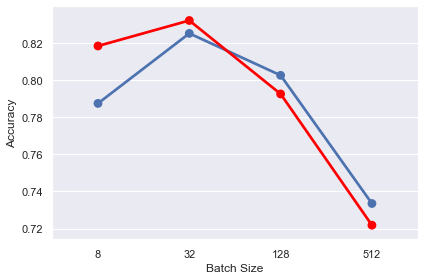

In [5]:
#Plot accuracy

# create two axes
fig = plt.figure()


# first subplot with boxplot
ax = sns.pointplot(x="Batchsize", y="Training", data=accuracy)
 

# second subplot with violinplot
ax2= sns.pointplot(x="Batchsize", y="Test", data=accuracy, color= 'red')#
#handling legends
ax.set(xlabel='Batch Size', ylabel='Accuracy')

fig.tight_layout()